In [18]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/hcvdat0.csv")

In [21]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.

1) X (Patient ID/No.)

2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

3) Age (in years)

4) Sex (f,m)

5) ALB

6) ALP

7) ALT

8) AST

9) BIL

10) CHE

11) CHOL

12) CREA

13) GGT

14) PROT

# Logistic Regression

In [22]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
data['Category']=le.fit_transform(data['Category'])
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [23]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(data[['CHOL']])
data[['CHOL']] = imputer.transform(data[['CHOL']])

In [25]:
imputer = imputer.fit(data[['PROT']])
data[['PROT']] = imputer.transform(data[['PROT']])

In [26]:
imputer = imputer.fit(data[['ALP']])
data[['ALP']] = imputer.transform(data[['ALP']])

In [27]:
imputer = imputer.fit(data[['ALT']])
data[['ALT']] = imputer.transform(data[['ALT']])

In [28]:
imputer = imputer.fit(data[['ALB']])
data[['ALB']] = imputer.transform(data[['ALB']])

In [29]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [30]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=data.iloc[:, [4,13]].values  
y=data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [31]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [32]:
# Fitting the Logistic Regression into the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
# Predicting the test set results

y_pred = classifier.predict(X_test)

Text(42.0, 0.5, 'Truth')

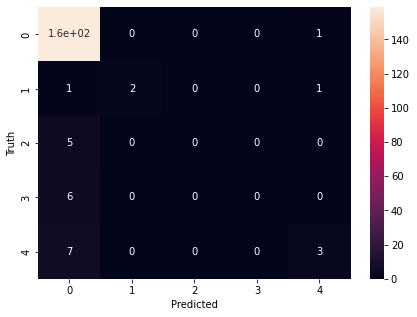

In [34]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')


# For Bank Churner's Dataset

In [35]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BankChurners.csv")

In [36]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [37]:
x = pd.DataFrame(data[["Credit_Limit", "Avg_Utilization_Ratio","Attrition_Flag"]])  

In [38]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
x['Attrition_Flag']=le.fit_transform(x['Attrition_Flag'])

In [39]:
x

,Credit_Limit,Avg_Utilization_Ratio,Attrition_Flag
0,12691.0,0.061,1
1,8256.0,0.105,1
2,3418.0,0.000,1
3,3313.0,0.760,1
4,4716.0,0.000,1
...,...,...,...
10122,4003.0,0.462,1
10123,4277.0,0.511,0
10124,5409.0,0.000,0
10125,5281.0,0.000,0


In [40]:
x = x.iloc[:200, :]
x.head()

,Credit_Limit,Avg_Utilization_Ratio,Attrition_Flag
0,12691.0,0.061,1
1,8256.0,0.105,1
2,3418.0,0.000,1
3,3313.0,0.760,1
4,4716.0,0.000,1


In [41]:
#Extracting independent and dependent variable  
X= x.iloc[:, [0,1]].values  
Y= x.iloc[:, [2]].values  

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [43]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [46]:
# Predicting the test set results

y_pred = classifier.predict(X_test)
print(classifier.score(X_test, y_test))

0.9


Text(42.0, 0.5, 'Truth')

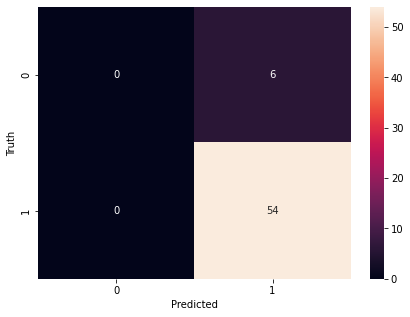

In [ ]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')